Roughly based on the keras mnist-mlp example, but using the [notmnist](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) dataset. The dataset consists of images of letters from A-J, in lots of different fonts. We'll be using a subset of the whole dataset.


In [47]:
# for DSX, need to switch to the right directory. Detect using path name.
s = %pwd
if s.startswith('/gpfs'):
    %cd ~/deep-learning-workshop/

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# for making plots prettier
import seaborn as sns 
sns.set_style('white')

In [3]:
from __future__ import print_function
np.random.seed(1337)  # for reproducibility

In [4]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.utils import np_utils

Using TensorFlow backend.


In [5]:
import notmnist
notmnist_path = "~/data/notmnist/notMNIST.pickle"

In [31]:
from display import visualize_keras_model, plot_training_curves
from helpers import combine_histories

# Load the data

In [8]:
# the data, shuffled and split between train, validation, and test sets
(x_train, y_train), (x_valid, y_valid), (x_test, y_test) = notmnist.load_data(notmnist_path)

# Look at the data

Always a good idea to know what you're working with.

In [9]:
len(x_train), len(x_valid), len(x_test)

(50000, 10000, 10000)

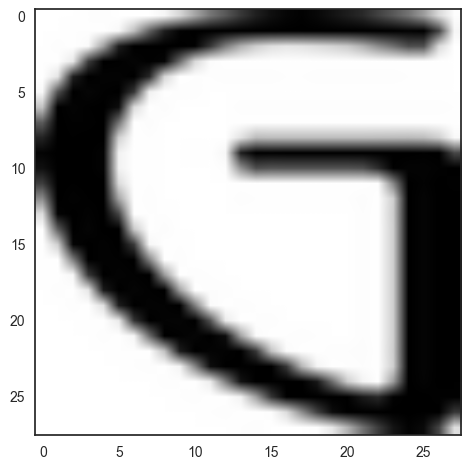

In [12]:
# expect images...
plt.imshow(x_train[0])

In [17]:
# Confirm that labels are in order, with 'a' == 0
y_train[0], ord('g')-ord('a')

(6, 6)

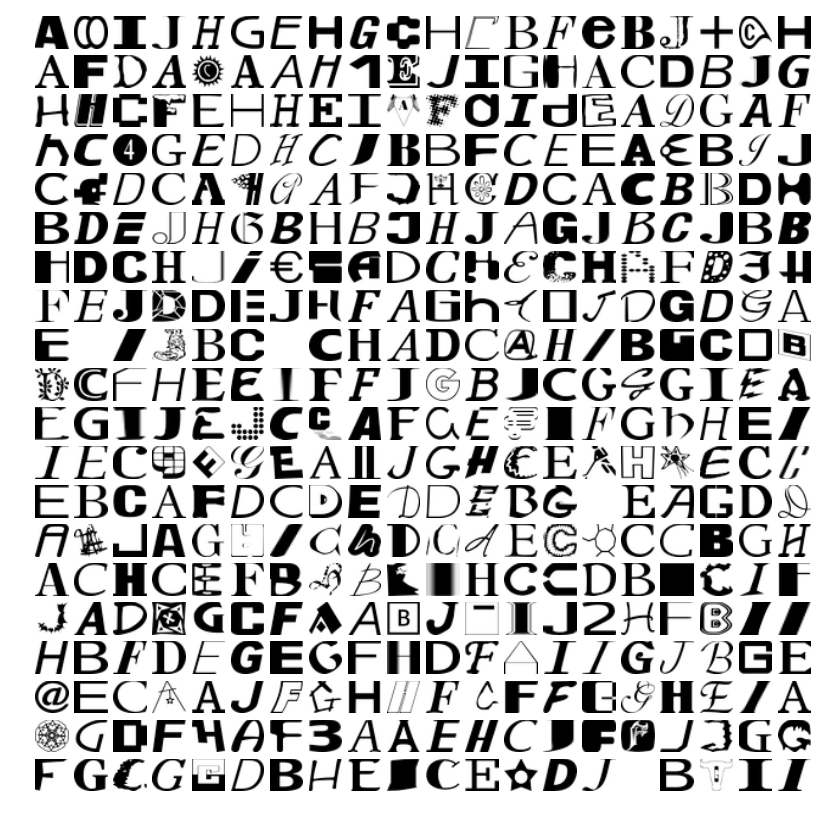

In [24]:
# Look at a bunch of examples
fig, axs = plt.subplots(20,20, sharex=True, sharey=True, figsize=(10,10))
for i, idx in enumerate(np.random.choice(len(x_train), 400, replace=False)):
    img = x_train[idx]
    ax = axs[i//20, i%20]
    ax.imshow(img)
    ax.axis('off')
sns.despine(fig, left=True, bottom=True)

Many look pretty straightforward, but some are clearly going to be challenging. e.g. what letters are the various stars supposed to be? Not to mention the totally blank images.

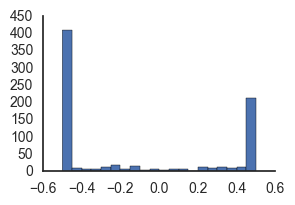

In [30]:
# look at the distribution of values being used
fig, ax = plt.subplots(figsize=(3,2))
ax.hist(x_train[0].flatten(), bins=20);
sns.despine(fig)

So values are normalized to be between -0.5 and 0.5. This is handy for feeding into neural networks, because of the useful ranges of our activation functions.

# Prepare the data

Reshape inputs to flat vectors, convert labels to one-hot.

In [32]:
x_train = x_train.reshape(-1, 784)
x_valid = x_valid.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
print(x_train.shape[0], 'train samples')
print(x_valid.shape[0], 'valid samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 valid samples
10000 test samples


In [33]:
batch_size = 128
nb_classes = 10
nb_epoch = 10

In [34]:
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, nb_classes)
y_valid = np_utils.to_categorical(y_valid, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

## Make our first multi-layer model

We'll have one "hidden" layer, then our output layer with 10 classes.

In [41]:
model = Sequential()
model.add(Dense(128, input_shape=(784,), name="hidden"))
model.add(Activation('relu', name="ReLU"))
model.add(Dense(10, name="output"))
model.add(Activation('softmax', name="softmax"))

model.summary()

# for multi-class classification, we'll use cross-entropy as the loss.
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              # Here, we tell Keras that we care about accuracy in addition to loss
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 128)               100480    
_________________________________________________________________
ReLU (Activation)            (None, 128)               0         
_________________________________________________________________
output (Dense)               (None, 10)                1290      
_________________________________________________________________
softmax (Activation)         (None, 10)                0         
Total params: 101,770.0
Trainable params: 101,770.0
Non-trainable params: 0.0
_________________________________________________________________


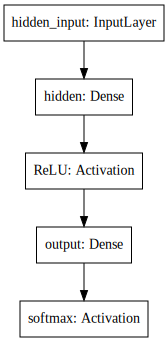

In [36]:
visualize_keras_model(model)

In [42]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(x_valid, y_valid))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 1s - loss: 0.6028 - acc: 0.8266 - val_loss: 0.5376 - val_acc: 0.8444
Epoch 2/10
50000/50000 [==============================] - 1s - loss: 0.4751 - acc: 0.8611 - val_loss: 0.5005 - val_acc: 0.8557
Epoch 3/10
50000/50000 [==============================] - 1s - loss: 0.4230 - acc: 0.8760 - val_loss: 0.4860 - val_acc: 0.8625
Epoch 4/10
50000/50000 [==============================] - 1s - loss: 0.3859 - acc: 0.8872 - val_loss: 0.4808 - val_acc: 0.8632
Epoch 5/10
50000/50000 [==============================] - 1s - loss: 0.3561 - acc: 0.8954 - val_loss: 0.4847 - val_acc: 0.8619
Epoch 6/10
50000/50000 [==============================] - 1s - loss: 0.3304 - acc: 0.9019 - val_loss: 0.4645 - val_acc: 0.8718
Epoch 7/10
50000/50000 [==============================] - 1s - loss: 0.3095 - acc: 0.9093 - val_loss: 0.4682 - val_acc: 0.8737
Epoch 8/10
50000/50000 [==============================] - 1s 

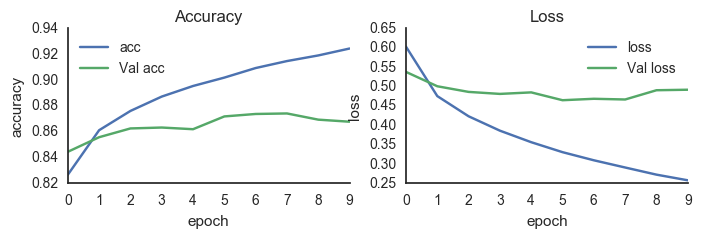

In [43]:
plot_training_curves(history.history);

Both training and validation accuracy still going up. Let's train some more.

In [44]:
history2 = model.fit(x_train, y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(x_valid, y_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 1s - loss: 0.2421 - acc: 0.9286 - val_loss: 0.4949 - val_acc: 0.8717
Epoch 2/10
50000/50000 [==============================] - 1s - loss: 0.2289 - acc: 0.9326 - val_loss: 0.4943 - val_acc: 0.8714
Epoch 3/10
50000/50000 [==============================] - 1s - loss: 0.2153 - acc: 0.9376 - val_loss: 0.5065 - val_acc: 0.8713
Epoch 4/10
50000/50000 [==============================] - 1s - loss: 0.2046 - acc: 0.9403 - val_loss: 0.5169 - val_acc: 0.8716
Epoch 5/10
50000/50000 [==============================] - 1s - loss: 0.1930 - acc: 0.9440 - val_loss: 0.5338 - val_acc: 0.8703
Epoch 6/10
50000/50000 [==============================] - 1s - loss: 0.1836 - acc: 0.9474 - val_loss: 0.5295 - val_acc: 0.8732
Epoch 7/10
50000/50000 [==============================] - 1s - loss: 0.1739 - acc: 0.9499 - val_loss: 0.5348 - val_acc: 0.8755
Epoch 8/10
50000/50000 [==============================] - 1s 

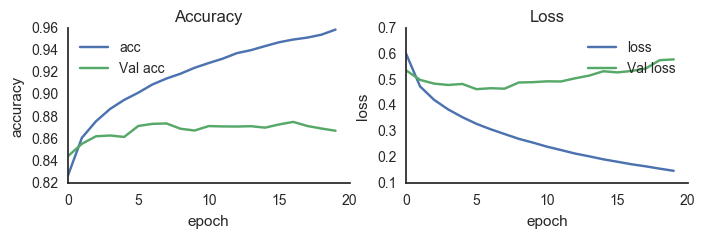

In [45]:
plot_training_curves(combine_histories(history.history, history2.history));

Training accuracy still going up, but doesn't help validation accuracy anymore. We can see this in the test score too (note that this is cheating a bit -- best practice is to not look at your test data till you're pretty happy with your model).

In [46]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.290495482884
Test accuracy: 0.929


Let's try a bigger model, with an extra layer, and dropout to reduce overfitting.

In [23]:
model2 = Sequential()
model2.add(Dense(512, input_shape=(784,), name="hidden1"))
model2.add(Activation('relu', name="ReLU1"))
model2.add(Dropout(0.2))
model2.add(Dense(512, input_shape=(784,), name="hidden2"))
model2.add(Activation('relu', name="ReLU2"))
model2.add(Dropout(0.2))
model2.add(Dense(10, name="output"))
model2.add(Activation('softmax', name="softmax"))

model2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

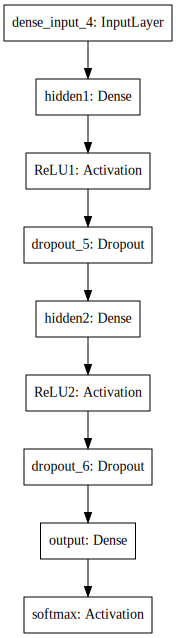

In [24]:
visualize_keras_model(model2)

In [28]:
# let's train for 20 epochs right away
history = model2.fit(x_train, y_train,
                    batch_size=batch_size, nb_epoch=20,
                    verbose=1, validation_data=(x_valid, y_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 27s - loss: 0.5953 - acc: 0.8205 - val_loss: 0.4904 - val_acc: 0.8527
Epoch 2/20
50000/50000 [==============================] - 26s - loss: 0.4538 - acc: 0.8622 - val_loss: 0.4417 - val_acc: 0.8655
Epoch 3/20
50000/50000 [==============================] - 25s - loss: 0.4005 - acc: 0.8774 - val_loss: 0.4257 - val_acc: 0.8761
Epoch 4/20
50000/50000 [==============================] - 25s - loss: 0.3620 - acc: 0.8881 - val_loss: 0.4209 - val_acc: 0.8746
Epoch 5/20
50000/50000 [==============================] - 25s - loss: 0.3328 - acc: 0.8978 - val_loss: 0.4232 - val_acc: 0.8691
Epoch 6/20
50000/50000 [==============================] - 25s - loss: 0.3128 - acc: 0.9030 - val_loss: 0.4238 - val_acc: 0.8784
Epoch 7/20
50000/50000 [==============================] - 25s - loss: 0.2917 - acc: 0.9096 - val_loss: 0.4361 - val_acc: 0.8798
Epoch 8/20
50000/50000 [==============================

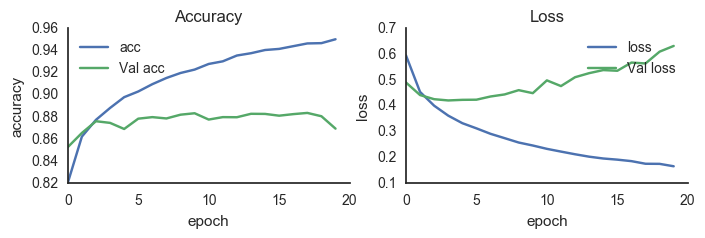

In [29]:
plot_training_curves(history.history);

So, validation accuracy plateaus very quickly. It's somewhat strange that it starts out higher than training accuracy too. Likely noise...

Let's add more regularization to the model -- higher dropout first.

In [30]:
model3 = Sequential()
model3.add(Dense(512, input_shape=(784,), name="hidden1"))
model3.add(Activation('relu', name="ReLU1"))
model3.add(Dropout(0.5))
model3.add(Dense(512, input_shape=(784,), name="hidden2"))
model3.add(Activation('relu', name="ReLU2"))
model3.add(Dropout(0.5))
model3.add(Dense(10, name="output"))
model3.add(Activation('softmax', name="softmax"))

model3.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])


In [33]:
history = model3.fit(x_train, y_train,
                    batch_size=batch_size, nb_epoch=20,
                    verbose=1, validation_data=(x_valid, y_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 27s - loss: 0.7028 - acc: 0.7939 - val_loss: 0.5216 - val_acc: 0.8442
Epoch 2/20
50000/50000 [==============================] - 26s - loss: 0.5642 - acc: 0.8325 - val_loss: 0.4996 - val_acc: 0.8515
Epoch 3/20
50000/50000 [==============================] - 30s - loss: 0.5226 - acc: 0.8434 - val_loss: 0.4714 - val_acc: 0.8574
Epoch 4/20
50000/50000 [==============================] - 27s - loss: 0.5028 - acc: 0.8503 - val_loss: 0.4460 - val_acc: 0.8678
Epoch 5/20
50000/50000 [==============================] - 26s - loss: 0.4869 - acc: 0.8541 - val_loss: 0.4477 - val_acc: 0.8686
Epoch 6/20
50000/50000 [==============================] - 28s - loss: 0.4808 - acc: 0.8561 - val_loss: 0.4388 - val_acc: 0.8711
Epoch 7/20
50000/50000 [==============================] - 27s - loss: 0.4627 - acc: 0.8635 - val_loss: 0.4344 - val_acc: 0.8715
Epoch 8/20
50000/50000 [==============================

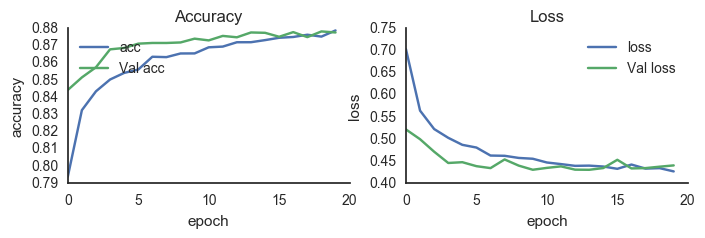

In [34]:
plot_training_curves(history.history);

Aha. Much better curves. Still going up, so let's train some more. 

In [35]:
history = model3.fit(x_train, y_train,
                    batch_size=batch_size, nb_epoch=20,
                    verbose=1, validation_data=(x_valid, y_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 26s - loss: 0.4292 - acc: 0.8779 - val_loss: 0.4365 - val_acc: 0.8810
Epoch 2/20
50000/50000 [==============================] - 25s - loss: 0.4231 - acc: 0.8809 - val_loss: 0.4387 - val_acc: 0.8742
Epoch 3/20
50000/50000 [==============================] - 29s - loss: 0.4282 - acc: 0.8794 - val_loss: 0.4454 - val_acc: 0.8775
Epoch 4/20
50000/50000 [==============================] - 29s - loss: 0.4236 - acc: 0.8811 - val_loss: 0.4521 - val_acc: 0.8761
Epoch 5/20
50000/50000 [==============================] - 28s - loss: 0.4208 - acc: 0.8804 - val_loss: 0.4575 - val_acc: 0.8771
Epoch 6/20
50000/50000 [==============================] - 27s - loss: 0.4220 - acc: 0.8820 - val_loss: 0.4622 - val_acc: 0.8765
Epoch 7/20
50000/50000 [==============================] - 30s - loss: 0.4246 - acc: 0.8819 - val_loss: 0.4620 - val_acc: 0.8759
Epoch 8/20
50000/50000 [==============================

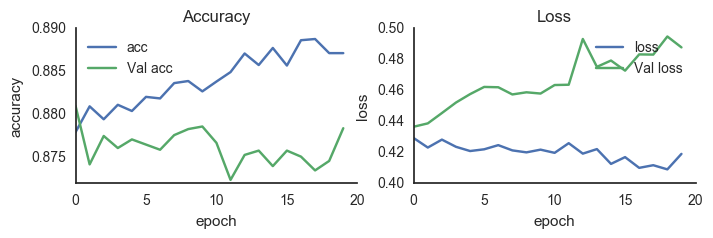

In [36]:
plot_training_curves(history.history);

Ok, not gaining much anymore (note new scale). Could fiddle further (e.g. reducing learning rate now that performance has plateaued), but let's stop for now. We'll try more sophisticated approaches later to get better performance. Now we can look at test performance.

In [37]:
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.246198837049
Test accuracy: 0.933


You should be surprised that the test accuracy is significantly better than the validation accuracy. The reason is that the test set is "clean"--manually curated, so practically all the labels are correct. The training and validation sets are noisy, and have some wrong labels. 

## Questions you should have

This is an intro, so there were many "magical" decisions in the above code. I suggest making your own list, then comparing to this partial one:

- why start with dropout 0.2, then switch to 0.5. Why not something else?
- why two hidden layers?
- why not a different batch size?
- why use the RMSprop optimizer?
- why use 512 hidden units in the hidden layers? Why not more or less?
- Are there other ways of reducing overfitting besides dropout? Would they work as well?

As a preview, the primary answer to all of the above is "try initial values based on your own and others' experience, then tweak from there."